# Data analysis of $\text{CO}_2$ emissions

This is a basic exploratory analysis of the global $\text{CO}_2$ emissions. I use the Our World in Data (owid) datasets through their Python API `owid-catalog`.

To install their api: `pip install owid-catalog`.

In [1]:
from owid import catalog
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

We find which datasets contain data about $\text{CO}_2$

In [2]:
catalog.find('co2')

table                dataset     version  \
1377                 _9_4_1_en_atm_co2                 un_sdg  2023-01-24   
1378                 _9_4_1_en_atm_co2                 un_sdg  2023-08-16   
1379              _9_4_1_en_atm_co2gdp                 un_sdg  2023-01-24   
1380              _9_4_1_en_atm_co2gdp                 un_sdg  2023-08-16   
1381              _9_4_1_en_atm_co2mva                 un_sdg  2023-01-24   
1382              _9_4_1_en_atm_co2mva                 un_sdg  2023-08-16   
3868                 co2_air_transport      co2_air_transport  2023-05-19   
3869  co2_mitigation_curves_1p5celsius  co2_mitigation_curves  2019-12-03   
3870    co2_mitigation_curves_2celsius  co2_mitigation_curves  2019-12-03   
9932                          owid_co2               owid_co2  2023-05-03   
9933                          owid_co2               owid_co2  2023-07-10   

      namespace channel  is_public  \
1377         un  garden       True   
1378         un  garden       True   
1379         un  garden       True   
1380         un  garden       True   
1381         un  garden       True   
1382         un  garden       True   
3868       oecd  garden       True   
3869     andrew  garden       True   
3870     andrew  garden       True   
9932  emissions  garden       True   
9933  emissions  garden       True   

                                             dimensions  \
1377  [country, year, goal, target, indicator, serie...   
1378  [country, year, goal, target, indicator, serie...   
1379  [country, year, goal, target, indicator, serie...   
1380  [country, year, goal, target, indicator, serie...   
1381  [country, year, goal, target, indicator, serie...   
1382  [country, year, goal, target, indicator, serie...   
3868                                    [country, year]   
3869                                     [year, origin]   
3870                                     [year, origin]   
9932                                    [country, year]   
9933                                    [country, year]   

                                                   path    formats  
1377      garden/un/2023-01-24/un_sdg/_9_4_1_en_atm_co2  [feather]  
1378      garden/un/2023-08-16/un_sdg/_9_4_1_en_atm_co2  [feather]  
1379   garden/un/2023-01-24/un_sdg/_9_4_1_en_atm_co2gdp  [feather]  
1380   garden/un/2023-08-16/un_sdg/_9_4_1_en_atm_co2gdp  [feather]  
1381   garden/un/2023-01-24/un_sdg/_9_4_1_en_atm_co2mva  [feather]  
1382   garden/un/2023-08-16/un_sdg/_9_4_1_en_atm_co2mva  [feather]  
3868  garden/oecd/2023-05-19/co2_air_transport/co2_a...  [feather]  
3869  garden/andrew/2019-12-03/co2_mitigation_curves...  [feather]  
3870  garden/andrew/2019-12-03/co2_mitigation_curves...  [feather]  
9932      garden/emissions/2023-05-03/owid_co2/owid_co2  [feather]  
9933      garden/emissions/2023-07-10/owid_co2/owid_co2  [feather]

The one that interests us is the `owid_co2` from `2023-07-10`, in the garden channel (garden means that the data has already been preprocessed and cleaned for easier analysis)

In [3]:
co2_emissions = pd.DataFrame(catalog.find('co2', namespace = 'emissions', version='2023-07-10').load()) # load latest version of the emissions dataset

In [4]:
co2_emissions

co2  co2_per_capita  trade_co2  cement_co2  \
country     year                                                     
Afghanistan 1850        NaN             NaN        NaN         NaN   
            1851        NaN             NaN        NaN         NaN   
            1852        NaN             NaN        NaN         NaN   
            1853        NaN             NaN        NaN         NaN   
            1854        NaN             NaN        NaN         NaN   
...                     ...             ...        ...         ...   
Zimbabwe    2017   9.596071        0.650533   0.910308    0.468867   
            2018  11.795478        0.783639   0.771109    0.557990   
            2019  11.114607        0.723861   0.977537    0.569615   
            2020  10.607897        0.676970   1.005721    0.569615   
            2021  11.296114        0.706293        NaN    0.569615   

                  cement_co2_per_capita  coal_co2  coal_co2_per_capita  \
country     year                                                         
Afghanistan 1850                    NaN       NaN                  NaN   
            1851                    NaN       NaN                  NaN   
            1852                    NaN       NaN                  NaN   
            1853                    NaN       NaN                  NaN   
            1854                    NaN       NaN                  NaN   
...                                 ...       ...                  ...   
Zimbabwe    2017               0.031785  5.900452             0.400001   
            2018               0.037070  7.177776             0.476859   
            2019               0.037097  6.888320             0.448616   
            2020               0.036351  6.721571             0.428954   
            2021               0.035615  7.225620             0.451784   

                  flaring_co2  flaring_co2_per_capita  gas_co2  ...  methane  \
country     year                                                ...            
Afghanistan 1850          NaN                     NaN      NaN  ...      NaN   
            1851          NaN                     NaN      NaN  ...      NaN   
            1852          NaN                     NaN      NaN  ...      NaN   
            1853          NaN                     NaN      NaN  ...      NaN   
            1854          NaN                     NaN      NaN  ...      NaN   
...                       ...                     ...      ...  ...      ...   
Zimbabwe    2017          0.0                     0.0      0.0  ...    12.12   
            2018          0.0                     0.0      0.0  ...    12.44   
            2019          0.0                     0.0      0.0  ...    12.68   
            2020          0.0                     0.0      0.0  ...      NaN   
            2021          0.0                     0.0      0.0  ...      NaN   

                  methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
country     year                                                                
Afghanistan 1850                 NaN            NaN                       NaN   
            1851                 NaN            NaN                       NaN   
            1852                 NaN            NaN                       NaN   
            1853                 NaN            NaN                       NaN   
            1854                 NaN            NaN                       NaN   
...                              ...            ...                       ...   
Zimbabwe    2017            0.821634           5.24                  0.355228   
            2018            0.826458           5.43                  0.360745   
            2019            0.825811           5.50                  0.358199   
            2020                 NaN            NaN                       NaN   
            2021                 NaN            NaN                       NaN   

                  primary_energy_consumption  energy_pe

More information on the columns can be found here: [https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv).

The DataFrame has MultiIndex, so we need to slice accordingly to retrieve the data that interest us.

In [5]:
idx = pd.IndexSlice
co2_emissions.loc[idx[:, 2021], idx['co2', 'iso_code']]

co2 iso_code
country        year                       
Afghanistan    2021     11.874211      AFG
Africa         2021   1450.796265      NaN
Africa (GCP)   2021   1450.782593      NaN
Aland Islands  2021           NaN      ALA
Albania        2021      4.619109      ALB
...                           ...      ...
Western Sahara 2021           NaN      ESH
World          2021  37123.851562      NaN
Yemen          2021     12.476597      YEM
Zambia         2021      7.676180      ZMB
Zimbabwe       2021     11.296114      ZWE

[271 rows x 2 columns]

## Analysis of global $\text{CO}_2$ emissions worldwide

In [6]:
global_co2 = pd.DataFrame(co2_emissions.xs('World').co2)
global_co2.head()
global_co2.tail()

co2
year              
2017  36096.738281
2018  36826.507812
2019  37082.558594
2020  35264.085938
2021  37123.851562

In [7]:
global_co2.describe()

co2
count    272.000000
mean    6385.771973
std    10124.916992
min        9.350528
25%       49.590407
50%     1017.573425
75%     6683.314209
max    37123.851562

The information we can get from the above statistics are that:
- we have data for the past 272 years,
- The average yearly emissions of $\text{CO}_2$ over these 272 years is $6385.77$ million tones per year,
- We have a huge standard deviation of $10`124.92$ million tones,
- The lowest amount of $\text{CO}_2$ emitted was $9.35$ million tones, and the most we emitted was $37`123.85$ million tones
- We emitted less that $6'683.31$ million tones of $\text{CO}_2$ 75% of the time, meaning that 25% of the time, or for 68 years, we emitted more than $6'683.31$ million tones of $\text{CO}_2$.

Let us find the years we emitted the lowest, the largest amount of $\text{CO}_2$, and the years we emitted more that $6683.31$ million tones of $\text{CO}_2$.

In [8]:
print('Year for which we emitted the lowest amount of CO2: ', global_co2.co2.idxmin()) # idxmin() return the index (here the year) for which the minimum is reached
print('Year for which we emitted the largest amount of CO2: ', global_co2.co2.idxmax()) # idxmax() is similar for the maximum
print('Years we emitted > 6683.31 million tones of CO2: ', list(global_co2[global_co2.co2 > 6683.314209].index))
print('Number of years: ', len(list(global_co2[global_co2.co2 > 6683.314209].index)))

Year for which we emitted the lowest amount of CO2:  1750
Year for which we emitted the largest amount of CO2:  2021
Years we emitted > 6683.31 million tones of CO2:  [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Number of years:  68


Thus we see that the lowest amount was emitted the first year we have records, and the largest amount was recorded the last year we have records. Moreover, for the last 68 years, we emitted more than $6'683.31$ million tones of $\text{CO}_2$.

Let us visualize the emissions graphically.

[Text(0.5, 1.0, 'Global CO2 emissions worldwide, in millions of tones')]

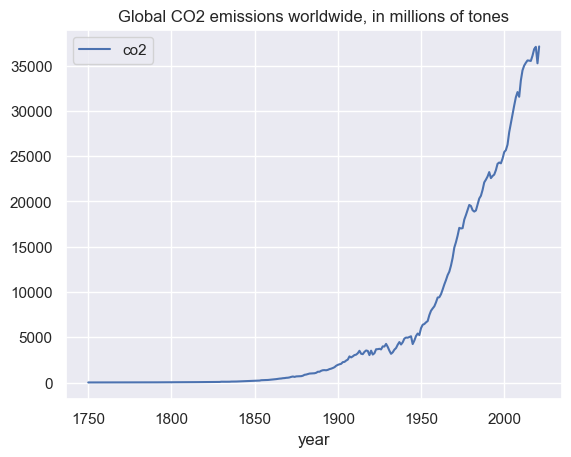

In [9]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=global_co2).set(title='Global CO2 emissions worldwide, in millions of tones')

The trend looks exponential. We can do an exponential regression of the data by taking the $\log$ of the emissions, do a linear regression, and retransform the data by taking the exponential.  
Assume that our linear regression has the form $\log(y(t)) = a + b \cdot t$, where $t$ denotes the years, $a$ and $b$ are the parameters of the linear regression and $y(t)$ approximates the $\text{CO}_2$ emissions. Then the emissions are approximated by 
$$y(t) = \exp(a + b \cdot t) = \exp(a) \cdot \exp(b \cdot t).$$
We use `LinearRegression` from the Python library `sklearn.linear_model` to perform the linear regression. The parameter $a$ is given by `LinearRegression().intercept_` and the parameter $b$ by `LinearRegression().coef_[0]`. 

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(global_co2.co2.index).reshape(-1,1), np.log(global_co2.co2))

LinearRegression()

Let us use the model to try to predict what could happen by 2030.

[Text(0.5, 1.0, 'Global CO2 emissions, in millions of tones')]

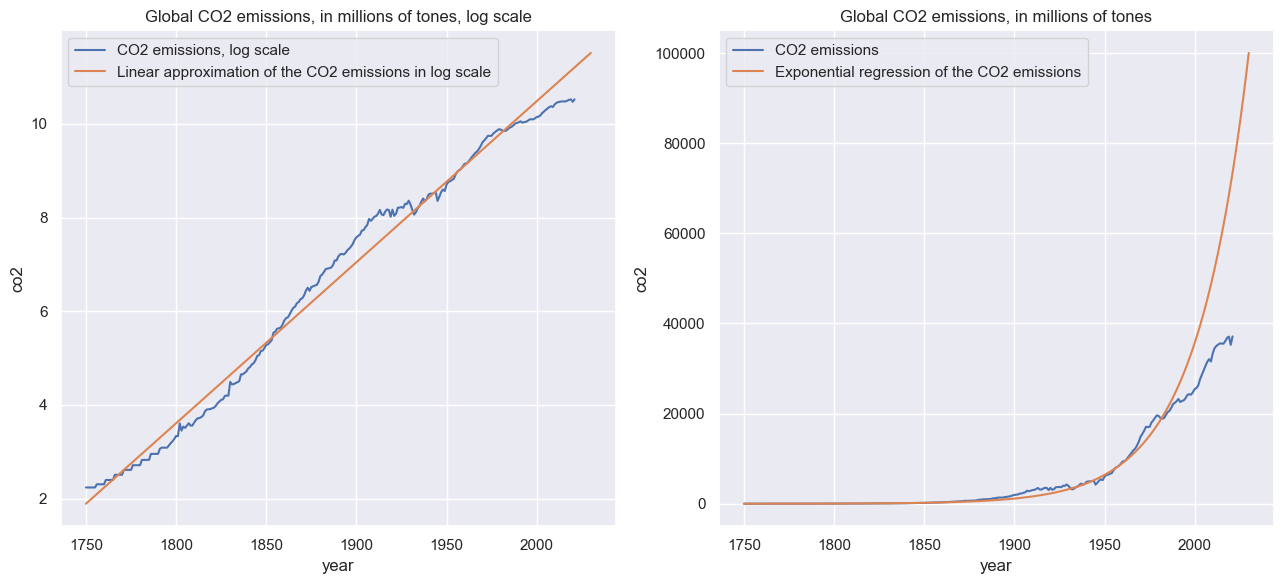

In [11]:
plt.rcParams['figure.figsize'] = [13, 6]
plt.rcParams['figure.autolayout']=True
f, axes = plt.subplots(1, 2)
sns.lineplot(data=(np.log(global_co2.co2)), ax=axes[0], label='CO2 emissions, log scale')
X = np.concatenate((np.array(global_co2.co2.index), np.array(range(2022,2031))))
sns.lineplot(x=X, y=model.intercept_ + model.coef_[0]*X, ax=axes[0], label='Linear approximation of the CO2 emissions in log scale').set(title="Global CO2 emissions, in millions of tones, log scale")


sns.lineplot(data=global_co2.co2, ax=axes[1], label = "CO2 emissions")
sns.lineplot(x=X, y=np.exp(model.intercept_) * np.exp(X*model.coef_[0]), ax=axes[1], label = "Exponential regression of the CO2 emissions").set(title="Global CO2 emissions, in millions of tones")

We see that our regression until roughly the '80s, but then it overshoots greatly the values. Thus the exponential regression is not accurate to predict what will happen in 2030. This means at least that we stopped being on an exponential trend, and although the amount of $\text{CO}_2$ we emit still increases, the increase is not exponential.

Let us try, without comparing the models here, nor optimizing hyperparameters, another type of regression. Let us try a regression model for non linear function, such a Polynomial regression of degree 5

[Text(0.5, 1.0, 'Global CO2 emissions, in millions of tones')]

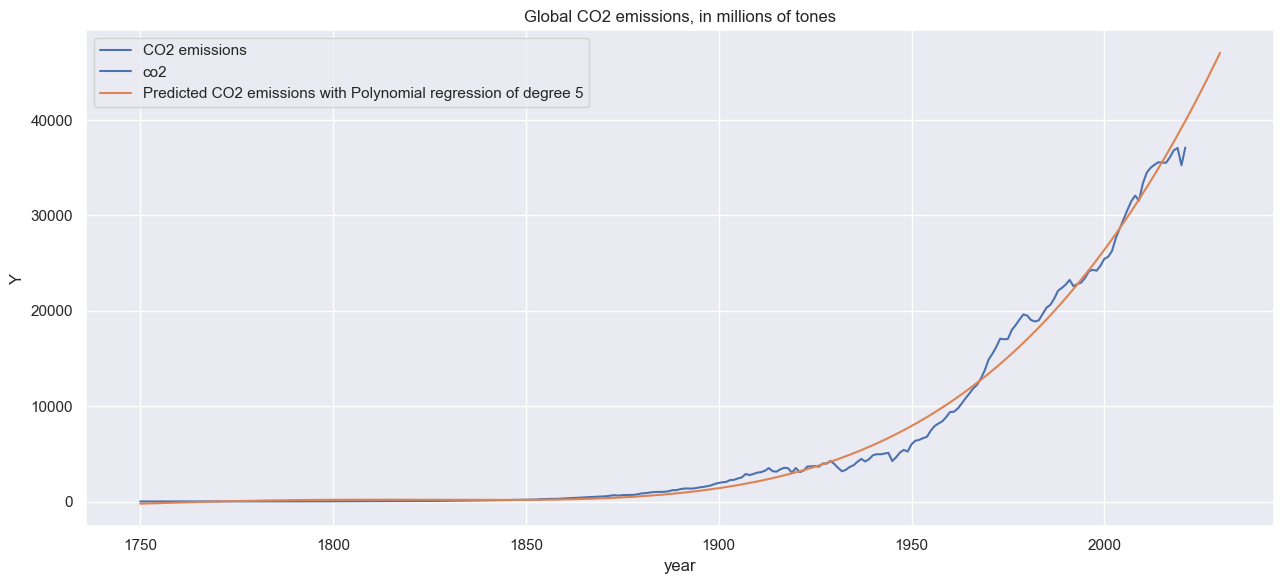

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(np.array(global_co2.co2.index).reshape(-1,1))

model = LinearRegression()

model.fit(x_poly, global_co2.co2)
x_poly = poly_reg.fit_transform(np.concatenate((global_co2.co2.index, np.array(range(2022, 2031)))).reshape(-1,1))
predictions = model.predict(x_poly)
tmp_df = pd.DataFrame({'X': np.concatenate((global_co2.co2.index, np.array(range(2022, 2031)))), 'Y': predictions})

sns.lineplot(data=global_co2, errorbar='sd',label = "CO2 emissions")
sns.lineplot(data = tmp_df, x = 'X', y = 'Y', label="Predicted CO2 emissions with Polynomial regression of degree 5").set(title="Global CO2 emissions, in millions of tones")

This regression is much more satisfying in the sense that it fits the known data rather closely and does not overshoot the current data as much as our exponential regression. On the other hand, it may be worrying that the rate at which the amount of $\text{CO}_2$ emissions increases can be estimated by a degree 5 polynomial.

### Global $\text{CO}_2$ emissions, breakdown analysis

Looking at [https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv), the $\text{CO}_2$ emissions are broken down in different categories, which are labelled as `xxx_co2` where `xxx` represent the category. Let's find the matching expressions, and then keep the one that interest us.

In [13]:
# We use the module re to create a regular expression that will match our pattern
import re

# the patterns we are interested are of the form xxx_co2
# (?=$|[^_]) is a positive lookahead assertion that checks for the end of the string ($)
# or any character that is not an underscore ([^_]) immediately following _co2.
pattern = r'\w+_co2(?=$|[^_])'

# We keep the matching patterns in a list
matching_expressions = [s for s in list(co2_emissions.columns) if re.match(pattern, s)]
print(matching_expressions)

['trade_co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'consumption_co2', 'cumulative_co2', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'share_global_co2', 'share_global_cement_co2', 'share_global_coal_co2', 'share_global_flaring_co2', 'share_global_gas_co2', 'share_global_oil_co2', 'share_global_other_co2', 'share_global_cumulative_co2', 'share_global_cumulative_cement_co2', 'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2', 'cumulative_luc_co2', 'share_global_cumulative_luc_co2', 'land_use_change_co2', 'share_global_luc_co2', 'temperature_change_from_co2']


We have the expression that interest us, and some additional one. Let us modify the regexp to remove expressions containing `cumulative`, or `share`.

In [14]:
pattern = r'(?!cumulative|share)\w+_co2(?=$|[^_])'
matching_expressions = [s for s in list(co2_emissions.columns) if re.match(pattern, s)]
print(sorted(matching_expressions))

['cement_co2', 'coal_co2', 'consumption_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'temperature_change_from_co2', 'trade_co2']


We can work with the result above, discarding `temperature_change_from_co2`. Let's make a summary table:  

| **Column**   | **Description**| 
|--------------|------------------|
| `cement_co2` | Annual production-based emissions of carbon dioxide (CO₂) from cement, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. |
| `coal_co2`   | Annual production-based emissions of carbon dioxide (CO₂) from coal, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.  |
|`consumption_co2`| Annual consumption-based emissions of carbon dioxide (CO₂), measured in million tonnes. Consumption-based emissions are national or regional emissions which have been adjusted for trade (i.e. territorial/production emissions minus emissions embedded in exports, plus emissions embedded in imports). If a country's consumption-based emissions are higher than its production emissions it is a net importer of carbon dioxide. Data has been converted by Our World in Data from million tonnes of carbon to million tonnes of CO₂ using a conversion factor of 3.664.       |
|`flaring_co2`| Annual production-based emissions of carbon dioxide (CO₂) from flaring, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.|
|`gas_co2`|  Annual production-based emissions of carbon dioxide (CO₂) from gas, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.      |
|`land_use_change_co2`| Annual production-based emissions of carbon dioxide (CO₂) from land-use change, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.       |
|`oil_co2`|Annual production-based emissions of carbon dioxide (CO₂) from oil, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.|
|`other_industry_co2`|Annual production-based emissions of carbon dioxide (CO₂) from other industry sources, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.|
|`trade_co2`| Annual net carbon dioxide (CO₂) emissions embedded in trade, measured in million tonnes. Net CO₂ emissions embedded in trade is the net of CO₂ which is imported or exported via traded goods with an economy. A positive value denotes a country or region is a net importer of CO₂ emissions; a negative value indicates a country is a net exporter.       |

In [15]:
# We keep the column that interest us, and only care for the worldwide values for now
co2_breakdown = co2_emissions[['cement_co2', 'coal_co2', 'consumption_co2', 'flaring_co2',
'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']].xs('World')
co2_breakdown.head()

cement_co2  coal_co2  consumption_co2  flaring_co2  gas_co2  \
year                                                                
1750         NaN  9.350528              NaN          NaN      NaN   
1751         NaN  9.350528              NaN          NaN      NaN   
1752         NaN  9.354192              NaN          NaN      NaN   
1753         NaN  9.354192              NaN          NaN      NaN   
1754         NaN  9.357856              NaN          NaN      NaN   

      land_use_change_co2  oil_co2  other_industry_co2  trade_co2  
year                                                               
1750                  NaN      NaN                 NaN        NaN  
1751                  NaN      NaN                 NaN        NaN  
1752                  NaN      NaN                 NaN        NaN  
1753                  NaN      NaN                 NaN        NaN  
1754                  NaN      NaN                 NaN        NaN

As before, let us check the basic statistics of our data

In [16]:
co2_breakdown.describe()

cement_co2      coal_co2  consumption_co2  flaring_co2      gas_co2  \
count   142.000000    272.000000        32.000000    72.000000   140.000000   
mean    317.372711   2956.580811     29734.914062   256.309509  1814.698608   
std     453.690063   3944.631592      5335.533691   114.017647  2326.854736   
min       0.000172      9.350528     22580.023438    73.624413     0.164880   
25%       0.148120     49.590407     24280.253906   159.925049    36.137394   
50%      71.409081    991.485687     30103.859375   250.638031   431.635681   
75%     435.955017   4047.788696     35277.867188   371.228424  3167.370605   
max    1672.592407  15051.512695     37123.851562   439.253998  7921.829590   

       land_use_change_co2       oil_co2  other_industry_co2  trade_co2  
count           172.000000    167.000000          118.000000  32.000000  
mean           4316.805176   3625.608887           82.069550  -0.000512  
std            1051.212646   4430.704102          107.362854   0.002207  
min            2394.546143      0.036640            1.320300  -0.004096  
25%            3650.351562     54.051075            2.750625  -0.002048  
50%            4428.004883    821.515991           31.014206   0.000000  
75%            5005.451172   8443.333984          216.138885   0.000000  
max            7104.862793  12345.653320          306.638580   0.004096

I do not have much to say looking at these statistics, except that most of the $\text{CO}_2$ seems to be emitted from the consumption. One funny thing if we look at the trade column, one would expect the average $\text{CO}_2$ emissions from trade to be $0$ by definition, but a negative sign implies that we are a net exporter. Does this include the garbage we send into space and the space missions, or are we trading with aliens lol?

Let us plot the data to get more intuition

Text(0.5, 1.0, 'Total CO2 emissions by category')

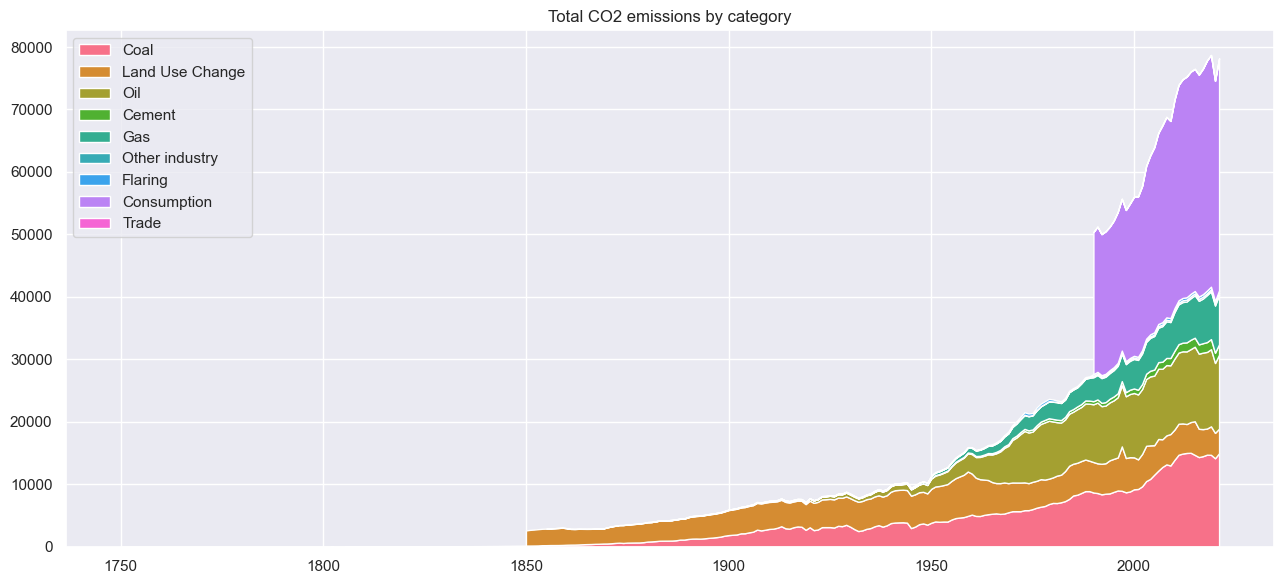

In [17]:
sns.set_theme(palette=sns.color_palette("husl", n_colors=9))

plt.stackplot(co2_breakdown.index, 
co2_breakdown.coal_co2,
co2_breakdown.land_use_change_co2, 
co2_breakdown.oil_co2,
co2_breakdown.cement_co2, 
co2_breakdown.gas_co2,
co2_breakdown.other_industry_co2,
co2_breakdown.flaring_co2, 
co2_breakdown.consumption_co2, 
co2_breakdown.trade_co2,
labels = ['Coal',
'Land Use Change', 
'Oil', 
'Cement',
'Gas',
'Other industry',
'Flaring',
'Consumption',
'Trade'])
plt.legend(loc='upper left')
plt.title("Total CO2 emissions by category")

As observed before, Consumption is the primary source of $\text{CO}_2$ emissions. Let us make another visualisation, this time using percentages.

Text(0.5, 1.0, 'Proportion of CO2 emissions by category')

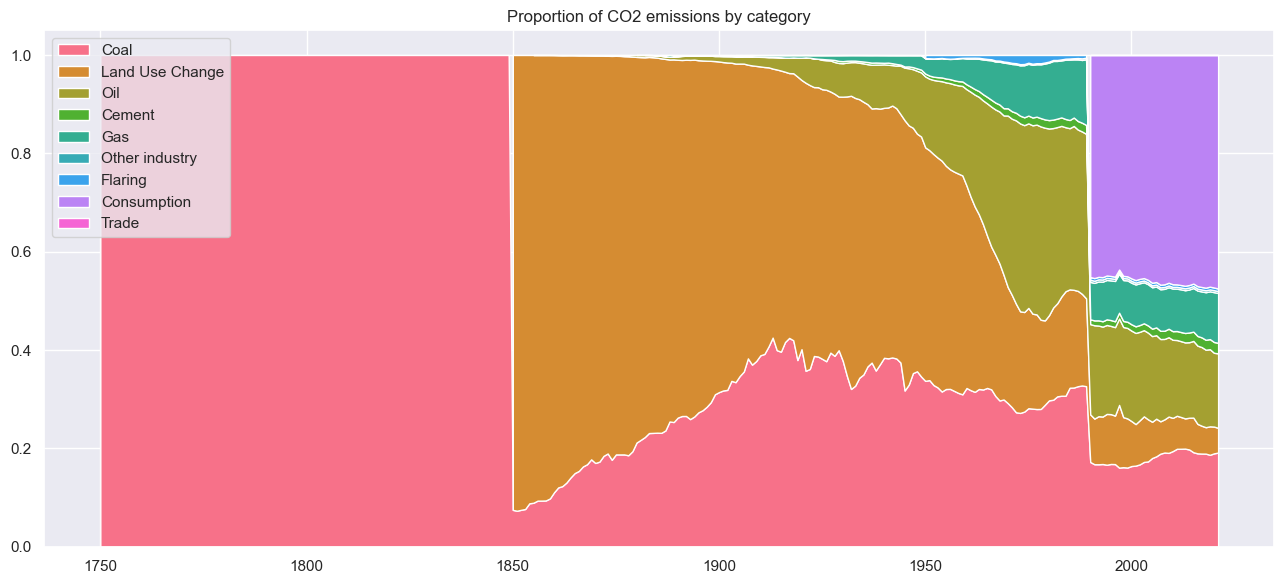

In [18]:
sns.set_theme(palette=sns.color_palette("husl", n_colors=9))

normalized_co2_breakdown = co2_breakdown.div(co2_breakdown.sum(axis=1), axis=0) # this normalizes our DataFrame for the visualization

plt.stackplot(normalized_co2_breakdown.index, 
normalized_co2_breakdown.coal_co2,
normalized_co2_breakdown.land_use_change_co2, 
normalized_co2_breakdown.oil_co2,
normalized_co2_breakdown.cement_co2, 
normalized_co2_breakdown.gas_co2,
normalized_co2_breakdown.other_industry_co2,
normalized_co2_breakdown.flaring_co2, 
normalized_co2_breakdown.consumption_co2, 
normalized_co2_breakdown.trade_co2, 
labels = ['Coal',
'Land Use Change', 
'Oil', 
'Cement',
'Gas',
'Other industry',
'Flaring',
'Consumption',
'Trade'])
plt.legend(loc='upper left')

plt.title("Proportion of CO2 emissions by category")

For fun, let's plot these visualisations again, but with `plotly` so that we have a slightly more interactive vision of the data

In [19]:
pd.options.plotting.backend = "plotly"

fig = co2_breakdown.plot.area(template="seaborn")
fig.show()

In [20]:
fig = normalized_co2_breakdown.plot.area(template="seaborn")
fig.show()

What we see from these plots, is that most of the $\text{CO}_2$ is emitted from the consumption (~48% in 2021), and coal and oil (~19% and 15% in 2021). Reducing these variables would amount to a substantial reduction in $\text{CO}_2$ emissions. However, it is not going in the right direction, consumption is still increasing, and coal looks like it may increase again in 2022 and 2023 (e.g. Germany reopend coal mines due to the Ukraine war).

### $\text{CO}_2$ emissions, by country

Let us now breakdown the emissions by country. I am especially interested in the countries, let's say the 25%, that emit the most $\text{CO}_2$

In [21]:
co2_emissions.head()

co2  co2_per_capita  trade_co2  cement_co2  \
country     year                                               
Afghanistan 1850  NaN             NaN        NaN         NaN   
            1851  NaN             NaN        NaN         NaN   
            1852  NaN             NaN        NaN         NaN   
            1853  NaN             NaN        NaN         NaN   
            1854  NaN             NaN        NaN         NaN   

                  cement_co2_per_capita  coal_co2  coal_co2_per_capita  \
country     year                                                         
Afghanistan 1850                    NaN       NaN                  NaN   
            1851                    NaN       NaN                  NaN   
            1852                    NaN       NaN                  NaN   
            1853                    NaN       NaN                  NaN   
            1854                    NaN       NaN                  NaN   

                  flaring_co2  flaring_co2_per_capita  gas_co2  ...  methane  \
country     year                                                ...            
Afghanistan 1850          NaN                     NaN      NaN  ...      NaN   
            1851          NaN                     NaN      NaN  ...      NaN   
            1852          NaN                     NaN      NaN  ...      NaN   
            1853          NaN                     NaN      NaN  ...      NaN   
            1854          NaN                     NaN      NaN  ...      NaN   

                  methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
country     year                                                                
Afghanistan 1850                 NaN            NaN                       NaN   
            1851                 NaN            NaN                       NaN   
            1852                 NaN            NaN                       NaN   
            1853                 NaN            NaN                       NaN   
            1854                 NaN            NaN                       NaN   

                  primary_energy_consumption  energy_per_capita  \
country     year                                                  
Afghanistan 1850                         NaN                NaN   
            1851                         NaN                NaN   
            1852                         NaN                NaN   
            1853                         NaN                NaN   
            1854                         NaN                NaN   

                  energy_per_gdp  gdp  population  iso_code  
country     year                                             
Afghanistan 1850             NaN  NaN     3752993       AFG  
            1851             NaN  NaN     3767956       AFG  
            1852             NaN  NaN     3783940       AFG  
            1853             NaN  NaN     3800954       AFG  
            1854             NaN  NaN     3818038       AFG  

[5 rows x 77 columns]

In [22]:
# We remove the continents and world data (each country theoretically has an iso_code, while continents and world do not)
co2_countries = co2_emissions[co2_emissions['iso_code'].notna()]
print(co2_emissions.shape, co2_countries.shape)

(50598, 77) (42142, 77)


In [23]:
# let's make sure we did not remove countries by accidents
# noinspection PyTypeChecker
pd.DataFrame(co2_emissions[co2_emissions['iso_code'].isna()].loc[idx[:, 2021], idx["iso_code"]])

iso_code
country                                       year         
Africa                                        2021      NaN
Africa (GCP)                                  2021      NaN
Asia                                          2021      NaN
Asia (GCP)                                    2021      NaN
Asia (excl. China and India)                  2021      NaN
Central America (GCP)                         2021      NaN
Europe                                        2021      NaN
Europe (GCP)                                  2021      NaN
Europe (excl. EU-27)                          2021      NaN
Europe (excl. EU-28)                          2021      NaN
European Union (27)                           2021      NaN
European Union (27) (GCP)                     2021      NaN
European Union (28)                           2021      NaN
French Equatorial Africa (Jones et al. 2023)  2021      NaN
French West Africa (Jones et al. 2023)        2021      NaN
High-income countries                         2021      NaN
International transport                       2021      NaN
Kosovo                                        2021      NaN
Kuwaiti Oil Fires (Jones et al. 2023)         2021      NaN
Least developed countries (Jones et al. 2023) 2021      NaN
Leeward Islands (Jones et al. 2023)           2021      NaN
Low-income countries                          2021      NaN
Lower-middle-income countries                 2021      NaN
Middle East (GCP)                             2021      NaN
Non-OECD (GCP)                                2021      NaN
North America                                 2021      NaN
North America (GCP)                           2021      NaN
North America (excl. USA)                     2021      NaN
OECD (GCP)                                    2021      NaN
OECD (Jones et al. 2023)                      2021      NaN
Oceania                                       2021      NaN
Oceania (GCP)                                 2021      NaN
Panama Canal Zone (Jones et al. 2023)         2021      NaN
Ryukyu Islands (Jones et al. 2023)            2021      NaN
South America                                 2021      NaN
South America (GCP)                           2021      NaN
St. Kitts-Nevis-Anguilla (Jones et al. 2023)  2021      NaN
Upper-middle-income countries                 2021      NaN
World                                         2021      NaN

For some reason, Kosovo is omitted. Let's add it again to the DataFrame

In [24]:
co2_countries = pd.concat([co2_emissions[co2_emissions['iso_code'].notna()], co2_emissions.loc[idx['Kosovo', :], idx[:]]])

In [25]:
co2_countries.loc[idx[:, 2021], idx['co2', 'iso_code']].describe()

co2
count    219.000000
mean     164.849777
std      875.773193
min        0.007948
25%        1.496244
50%        9.308101
75%       55.405266
max    11472.368164

75% of the countries emitted less than 55.405 millions of tones of $\text{CO}_2$ in 2021. Let us check how many countries emitted more than this.

In [26]:
# noinspection PyTypeChecker
len(list(co2_countries[co2_countries.co2 > 55.405].loc[idx[:, 2021], idx['co2']]))

55

In [27]:
# quantile to restrict ourselves to 25 countries emitting the most : q=(233 - 25)/233
# noinspection PyTypeChecker
nb_countries = len(list(co2_countries.loc[idx[:, 2021], idx['co2']]))
q = (nb_countries - 25)/nb_countries
print("Quantile: ", q)
# noinspection PyTypeChecker
quant_at_q = co2_countries.loc[idx[:, 2021], idx['co2']].quantile(q)
print("Quantity emitted at " + str(q) + " in 2021: ", quant_at_q)
largest_emitters = co2_countries[co2_countries.co2 >= quant_at_q]
# noinspection PyTypeChecker
new_idx = list(largest_emitters.loc[idx[:, 2021], idx['co2']].sort_values(ascending=False).index.get_level_values(0))
print("The largest emitters (in 2021) are: ", new_idx)
## We reindex the dataframe according to the biggest emitters in 2021
largest_emitters = largest_emitters.reindex(new_idx, level='country')
largest_emitters
# print("The largest emitters (in 2021) are: ", list(largest_emitters.loc[idx[:, 2021], idx['co2']]).sort())
#pd.DataFrame(largest_emitters.loc[idx[:, 2021], idx['co2']].sort_values(ascending=False))

Quantile:  0.8927038626609443
Quantity emitted at 0.8927038626609443 in 2021:  268.62448
The largest emitters (in 2021) are:  ['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Germany', 'Saudi Arabia', 'Indonesia', 'South Korea', 'Canada', 'Brazil', 'Turkey', 'South Africa', 'Mexico', 'Australia', 'United Kingdom', 'Italy', 'Poland', 'Vietnam', 'France', 'Taiwan', 'Thailand', 'Kazakhstan']


co2  co2_per_capita   trade_co2  cement_co2  \
country    year                                                       
China      1958  524.617065        0.814887         NaN    3.871059   
           1959  720.151550        1.104223         NaN    5.107301   
           1960  798.799927        1.221088         NaN    6.514202   
           1961  570.630188        0.870845         NaN    2.584869   
           1962  459.618073        0.691556         NaN    2.497458   
...                     ...             ...         ...         ...   
Kazakhstan 2017  320.791443       17.515402 -119.310989    3.817253   
           2018  331.820709       17.899391 -149.467010    3.890766   
           2019  297.569458       15.866767 -125.809792    3.800151   
           2020  278.404602       14.668894  -92.901581    4.448138   
           2021  276.683441       14.413248         NaN    4.448138   

                 cement_co2_per_capita    coal_co2  coal_co2_per_capita  \
country    year                                                           
China      1958               0.006013  508.174805             0.789347   
           1959               0.007831  695.438171             1.066330   
           1960               0.009958  748.375671             1.144007   
           1961               0.003945  522.475403             0.797355   
           1962               0.003758  411.925201             0.619796   
...                                ...         ...                  ...   
Kazakhstan 2017               0.208424  187.961868            10.262828   
           2018               0.209879  190.787781            10.291657   
           2019               0.202629  176.146118             9.392325   
           2020               0.234368  181.010498             9.537284   
           2021               0.231716  180.818466             9.419361   

                 flaring_co2  flaring_co2_per_capita    gas_co2  ...  \
country    year                                                  ...   
China      1958     0.000000                0.000000   0.212512  ...   
           1959     0.000000                0.000000   0.556928  ...   
           1960     0.000000                0.000000   1.993216  ...   
           1961     0.000000                0.000000   2.817616  ...   
           1962     0.000000                0.000000   2.322976  ...   
...                      ...                     ...        ...  ...   
Kazakhstan 2017    17.820606                0.973016  62.751163  ...   
           2018    16.760128                0.904091  68.573952  ...   
           2019    14.698167                0.783724  50.438957  ...   
           2020    16.843903                0.887490  32.208294  ...   
           2021    16.843903                0.877448  27.980221  ...   

                   methane  methane_per_capita  nitrous_oxide  \
country    year                                                 
China      1958        NaN                 NaN            NaN   
           1959        NaN                 NaN            NaN   
           1960        NaN                 NaN            NaN   
           1961        NaN                 NaN            NaN   
           1962        NaN                 NaN            NaN   
...                    ...                 ...            ...   
Kazakhstan 2017  50.650002            2.765520          13.38   
           2018  49.509998            2.670716          11.00   
           2019  48.889999            2.606874          12.17   
           2020        NaN                 NaN            NaN   
           2021        NaN                 NaN            NaN   

                 nitrous_oxide_per_capita  primary_energy_consumption  \
country    year                                                         
China      1958                       NaN                         NaN   
           1959                       NaN                         NaN   
           1960                       NaN        

Text(0.5, 1.0, 'CO2 emissions of the 24 countries that emitted the most CO2 in 2021 [in million of tones]')

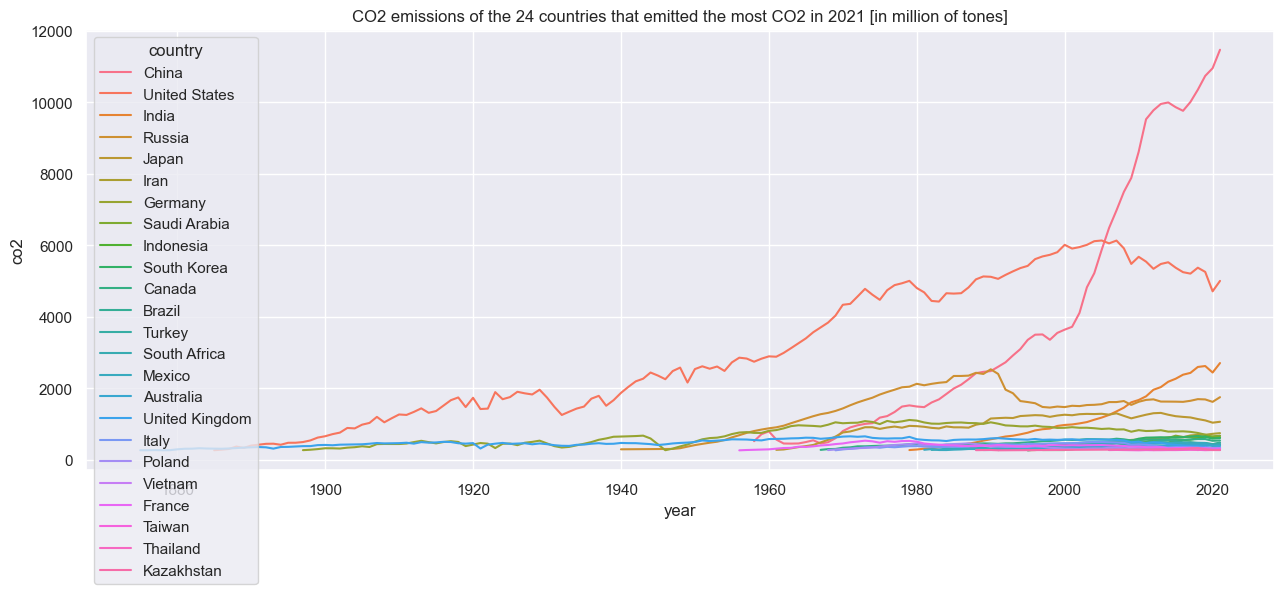

In [28]:
sns.lineplot(data=largest_emitters, x='year', y='co2', hue='country').set_title("CO2 emissions of the 24 countries that emitted the most CO2 in 2021 [in million of tones]")

We can do a similar plot, showing the average of the $\text{CO}_2$ emissions of these countries and the deviation.

Text(0.5, 1.0, 'Average CO2 emissions of the 24 countries that emitted the most CO2 in 2021')

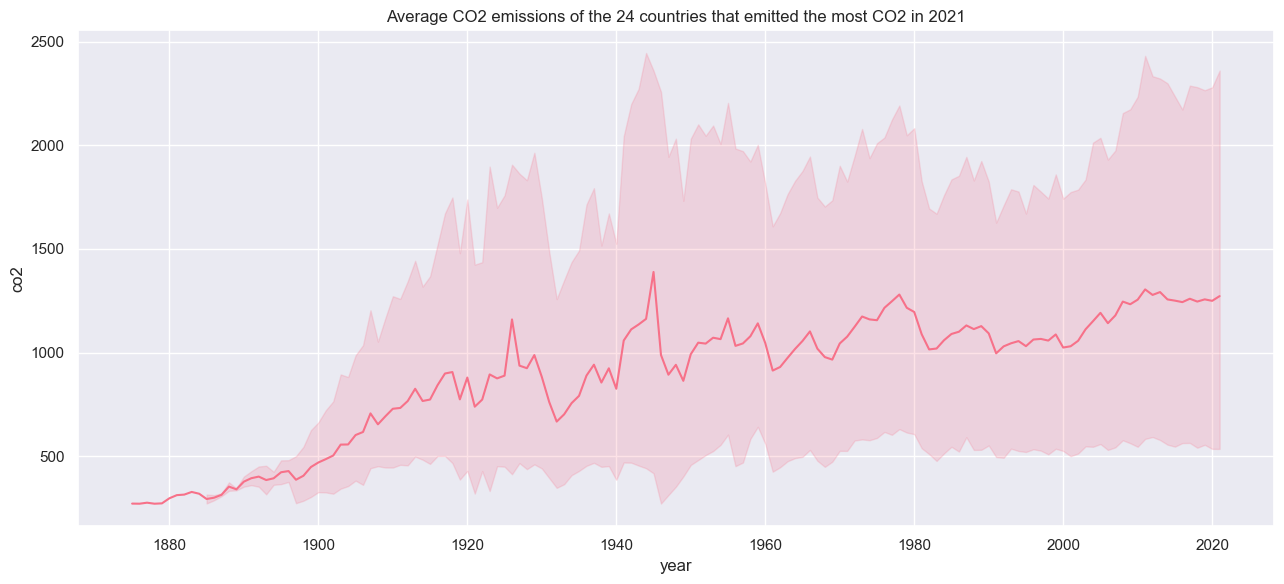

In [29]:
sns.lineplot(data = largest_emitters, x='year', y='co2').set_title("Average CO2 emissions of the 24 countries that emitted the most CO2 in 2021")

We can use `seaborn` to do a linear regression fit of this data.

<Axes: title={'center': 'Average CO2 emissions of the 24 countries that emitted the most CO2 in 2021'}, xlabel='year', ylabel='co2'>

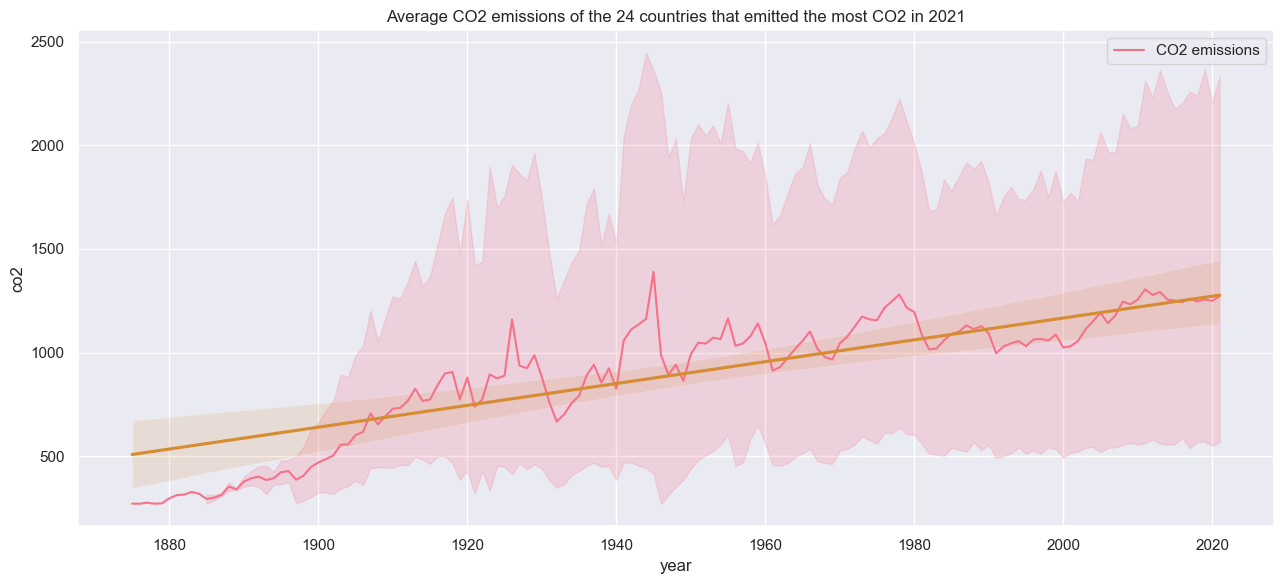

In [30]:
largest_emitters_reset = largest_emitters.reset_index()
sns.lineplot(data = largest_emitters, x='year', y='co2', label='CO2 emissions').set_title("Average CO2 emissions of the 24 countries that emitted the most CO2 in 2021")
sns.regplot(data=largest_emitters_reset, x='year', y='co2', scatter=False, label="Linear Regression")

Thus we see that the trend is that the 24 countries that emit the most CO2 keep emitting more and more CO2.
- We have an interesting pike around WWII
- We also have another increase since the 2000's, which is when the Internet boom started happening.

Let us now look at the cumulative CO2 emissions.

In [31]:
nb_countries = len(list(co2_countries.loc[idx[:, 2021], idx['co2']]))
print("Number of countries available: ", nb_countries)
q = (nb_countries - 25)/nb_countries
print("Quantile: ", q)
# noinspection PyTypeChecker
quant_at_q = co2_countries.loc[idx[:, 2021], idx['cumulative_co2']].quantile(q)
print("Quantity emitted at " + str(q) + " in 2021: ", quant_at_q)
largest_emitters_cum = co2_countries[co2_countries['cumulative_co2'] >= quant_at_q]
# noinspection PyTypeChecker
new_idx = list(largest_emitters.loc[idx[:, 2021], idx['cumulative_co2']].sort_values(ascending=False).index.get_level_values(0))
print("The largest emitters, cumulatively, (in 2021) are: ", new_idx)
## We reindex the dataframe according to the biggest emitters in 2021
largest_emitters_cum = largest_emitters_cum.reindex(new_idx, level='country')
largest_emitters_cum

Number of countries available:  233
Quantile:  0.8927038626609443
Quantity emitted at 0.8927038626609443 in 2021:  11999.843
The largest emitters, cumulatively, (in 2021) are:  ['United States', 'China', 'Russia', 'Germany', 'United Kingdom', 'Japan', 'India', 'France', 'Canada', 'Poland', 'Italy', 'South Africa', 'Mexico', 'Iran', 'Australia', 'South Korea', 'Saudi Arabia', 'Brazil', 'Indonesia', 'Kazakhstan', 'Turkey', 'Taiwan', 'Thailand', 'Vietnam']


co2  co2_per_capita   trade_co2  cement_co2  \
country       year                                                        
United States 1902   764.495728        9.839290         NaN    0.002158   
              1903   894.406921       11.294751         NaN    0.002548   
              1904   882.057556       10.929276         NaN    0.002749   
              1905   986.482422       11.993248         NaN    0.003512   
              1906  1035.471191       12.352037         NaN    0.004497   
...                         ...             ...         ...         ...   
Kazakhstan    2017   320.791443       17.515402 -119.310989    3.817253   
              2018   331.820709       17.899391 -149.467010    3.890766   
              2019   297.569458       15.866767 -125.809792    3.800151   
              2020   278.404602       14.668894  -92.901581    4.448138   
              2021   276.683441       14.413248         NaN    4.448138   

                    cement_co2_per_capita    coal_co2  coal_co2_per_capita  \
country       year                                                           
United States 1902               0.000028  715.930969             9.214246   
              1903               0.000032  840.041626            10.608215   
              1904               0.000034  818.270386            10.138910   
              1905               0.000043  913.479187            11.105704   
              1906               0.000054  964.049683            11.500056   
...                                   ...         ...                  ...   
Kazakhstan    2017               0.208424  187.961868            10.262828   
              2018               0.209879  190.787781            10.291657   
              2019               0.202629  176.146118             9.392325   
              2020               0.234368  181.010498             9.537284   
              2021               0.231716  180.818466             9.419361   

                    flaring_co2  flaring_co2_per_capita    gas_co2  ...  \
country       year                                                  ...   
United States 1902     0.000000                0.000000  13.692368  ...   
              1903     0.000000                0.000000  14.524096  ...   
              1904     0.000000                0.000000  15.161569  ...   
              1905     0.000000                0.000000  17.165840  ...   
              1906     0.000000                0.000000  19.016159  ...   
...                         ...                     ...        ...  ...   
Kazakhstan    2017    17.820606                0.973016  62.751163  ...   
              2018    16.760128                0.904091  68.573952  ...   
              2019    14.698167                0.783724  50.438957  ...   
              2020    16.843903                0.887490  32.208294  ...   
              2021    16.843903                0.877448  27.980221  ...   

                      methane  methane_per_capita  nitrous_oxide  \
country       year                                                 
United States 1902        NaN                 NaN            NaN   
              1903        NaN                 NaN            NaN   
              1904        NaN                 NaN            NaN   
              1905        NaN                 NaN            NaN   
              1906        NaN                 NaN            NaN   
...                       ...                 ...            ...   
Kazakhstan    2017  50.650002            2.765520          13.38   
              2018  49.509998            2.670716          11.00   
              2019  48.889999            2.606874          12.17   
              2020        NaN                 NaN            NaN   
              2021        NaN                 NaN            NaN   

                    nitrous_oxide_per_capita  primary_energy_consumption  \
country       year                                                         
United States 1902      

Text(0.5, 1.0, 'Cumulative CO2 emissions of the 24 countries that emitted the most CO2 in 2021 [in million of tones]')

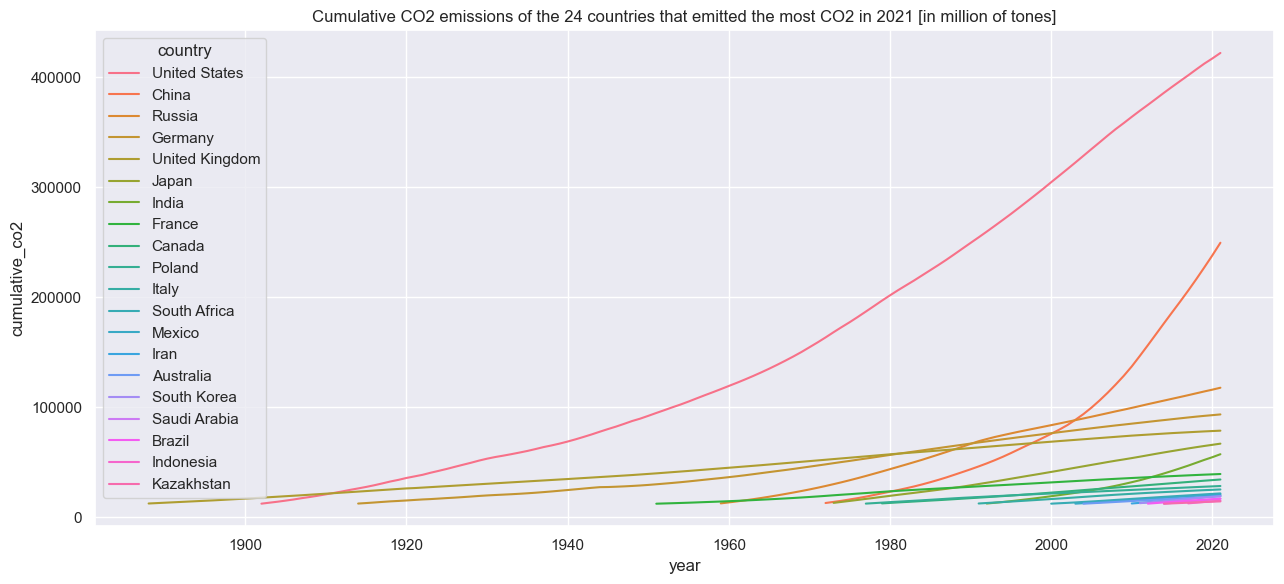

In [32]:
sns.lineplot(data=largest_emitters_cum, x='year', y='cumulative_co2', hue='country').set_title("Cumulative CO2 emissions of the 24 countries that emitted the most CO2 in 2021 [in million of tones]")

<Axes: title={'center': 'Average cumulative CO2 emissions of the 24 countries that emitted the most CO2 in 2021'}, xlabel='year', ylabel='cumulative_co2'>

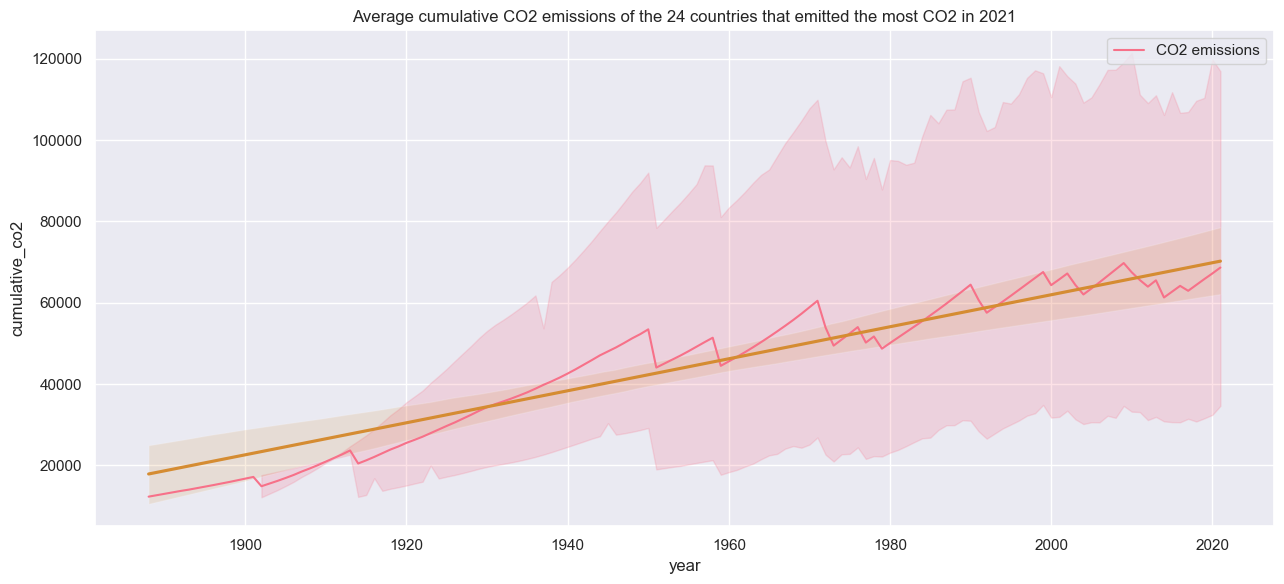

In [33]:
largest_emitters_cum_reset = largest_emitters_cum.reset_index()
sns.lineplot(data = largest_emitters_cum, x='year', y='cumulative_co2', label='CO2 emissions').set_title("Average cumulative CO2 emissions of the 24 countries that emitted the most CO2 in 2021")
sns.regplot(data=largest_emitters_cum_reset, x='year', y='cumulative_co2', scatter=False, label="Linear Regression")

Without surprise, the USA, China, Russia, India and western Europe are among the largest emitters. Furthermore, from the look of this data, I doubt that we'll reach the goals to reduce our carbon footprint by 2050.

The biggest emitters are also large countries. To account for this, let us look at the $\text{CO}_2$ per capita, measured in tonnes per person.

In [34]:
nb_countries = len(list(co2_countries.loc[idx[:, 2021], idx['co2']]))
q = (nb_countries - 25)/nb_countries
print("Quantile: ", q)
# noinspection PyTypeChecker
quant_at_q = co2_countries.loc[idx[:, 2021], idx['co2_per_capita']].quantile(q)
print("Quantity emitted at " + str(q) + " in 2021: ", quant_at_q)
largest_emitters = co2_countries[co2_countries['co2_per_capita'] >= quant_at_q]
# noinspection PyTypeChecker
new_idx = list(largest_emitters.loc[idx[:, 2021], idx['co2_per_capita']].sort_values(ascending=False).index.get_level_values(0))
print("The largest emitters per capita (in 2021) are: ", new_idx)
## We reindex the dataframe according to the biggest emitters in 2021
largest_emitters = largest_emitters.reindex(new_idx, level='country')
largest_emitters

Quantile:  0.8927038626609443
Quantity emitted at 0.8927038626609443 in 2021:  10.185345
The largest emitters per capita (in 2021) are:  ['Qatar', 'Bahrain', 'Kuwait', 'Trinidad and Tobago', 'Brunei', 'United Arab Emirates', 'New Caledonia', 'Saudi Arabia', 'Oman', 'Australia', 'Mongolia', 'United States', 'Sint Maarten (Dutch part)', 'Kazakhstan', 'Canada', 'Palau', 'Faroe Islands', 'Turkmenistan', 'Luxembourg', 'Russia', 'South Korea', 'Taiwan', 'Libya', 'Saint Pierre and Miquelon']


co2  co2_per_capita  trade_co2  \
country                   year                                        
Qatar                     1949  0.260144       11.039423        NaN   
                          1950  0.351744       14.469108        NaN   
                          1951  0.388384       15.464225        NaN   
                          1953  0.366400       13.661447        NaN   
                          1954  0.608224       21.936163        NaN   
...                                  ...             ...        ...   
Saint Pierre and Miquelon 2015  0.065952       10.990169        NaN   
                          2016  0.065952       11.010350        NaN   
                          2017  0.065952       11.028763        NaN   
                          2019  0.065952       11.080646        NaN   
                          2021  0.062033       10.505165        NaN   

                                cement_co2  cement_co2_per_capita  coal_co2  \
country                   year                                                
Qatar                     1949         0.0                    0.0       0.0   
                          1950         0.0                    0.0       0.0   
                          1951         0.0                    0.0       0.0   
                          1953         0.0                    0.0       0.0   
                          1954         0.0                    0.0       0.0   
...                                    ...                    ...       ...   
Saint Pierre and Miquelon 2015         0.0                    0.0       0.0   
                          2016         0.0                    0.0       0.0   
                          2017         0.0                    0.0       0.0   
                          2019         0.0                    0.0       0.0   
                          2021         0.0                    0.0       0.0   

                                coal_co2_per_capita  flaring_co2  \
country                   year                                     
Qatar                     1949                  0.0          0.0   
                          1950                  0.0          0.0   
                          1951                  0.0          0.0   
                          1953                  0.0          0.0   
                          1954                  0.0          0.0   
...                                             ...          ...   
Saint Pierre and Miquelon 2015                  0.0          0.0   
                          2016                  0.0          0.0   
                          2017                  0.0          0.0   
                          2019                  0.0          0.0   
                          2021                  0.0          0.0   

                                flaring_co2_per_capita  gas_co2  ...  methane  \
country                   year                                   ...            
Qatar                     1949                     0.0      0.0  ...      NaN   
                          1950                     0.0      0.0  ...      NaN   
                          1951                     0.0      0.0  ...      NaN   
                          1953                     0.0      0.0  ...      NaN   
                          1954                     0.0      0.0  ...      NaN   
...                                                ...      ...  ...      ...   
Saint Pierre and Miquelon 2015                     0.0      0.0  ...      NaN   
                          2016                     0.0      0.0  ...      NaN   
                          2017                     0.0      0.0  ...      NaN   
                          2019                     0.0      0.0  ...      NaN   
                          2021                     0.0      0.0  ...      NaN   

                                methane_per_capita  nitrous_oxide  \
country                   year                                      
Qatar   

Text(0.5, 1.0, 'CO2 emissions per capita of the 24 countries that emitted the most CO2 (per capita) in 2021 [in of tonnes/person]')

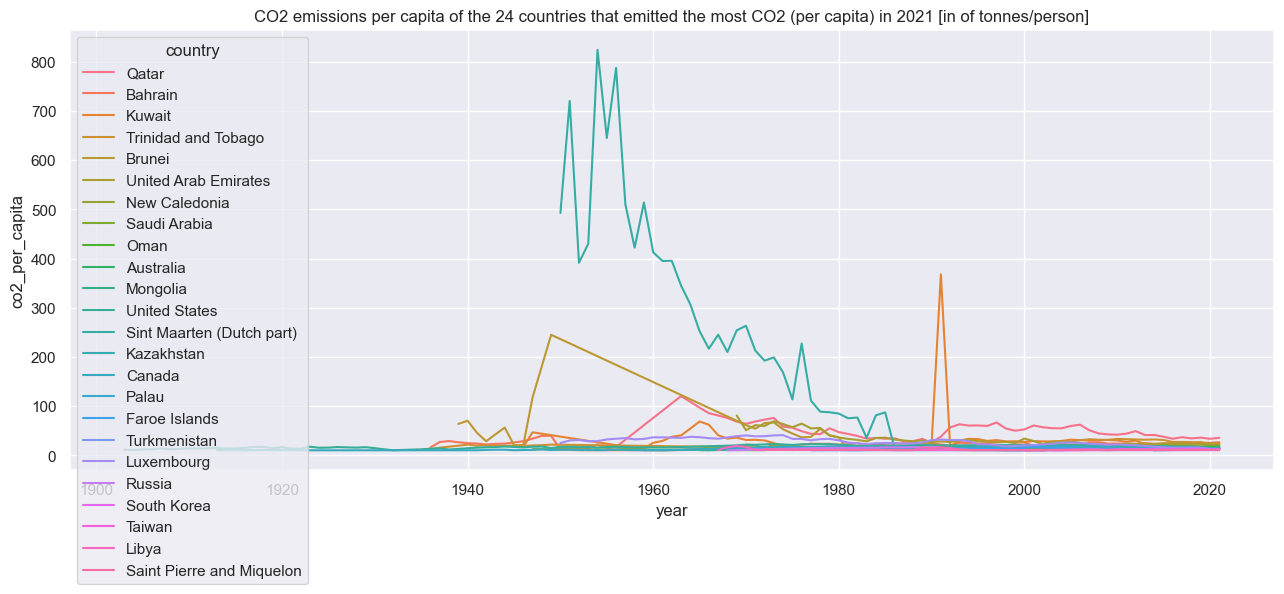

In [35]:
sns.lineplot(data=largest_emitters, x='year', y='co2_per_capita', hue='country').set_title("CO2 emissions per capita of the 24 countries that emitted the most CO2 (per capita) in 2021 [in of tonnes/person]")

There is an anomaly with Sint Maarten it seems. Let us check what it could come from.

In [36]:
print(largest_emitters['co2_per_capita'].idxmax())
print(largest_emitters.loc[idx['Sint Maarten (Dutch part)'], idx[:]].max())

('Sint Maarten (Dutch part)', 1954)


C:\Users\lhayez\AppData\Local\Temp\ipykernel_103044\3574860605.py:2: FutureWarning:

The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



co2                               2.169918
co2_per_capita                  824.456787
trade_co2                              NaN
cement_co2                        0.000000
cement_co2_per_capita             0.000000
                                  ...     
primary_energy_consumption             NaN
energy_per_capita                      NaN
energy_per_gdp                         NaN
gdp                                    NaN
population                    44061.000000
Length: 76, dtype: float64


Let us check what happend from 1950 to 1980 more precisely. We need to check the `co2` and `popupulation` columns

In [37]:
St_M = pd.DataFrame(largest_emitters.loc[idx['Sint Maarten (Dutch part)', 1950:1980], idx['population', 'co2', 'co2_per_capita']])
St_M

population       co2  co2_per_capita
country                   year                                      
Sint Maarten (Dutch part) 1950        1480  0.729008      492.572968
                          1951        1596  1.149743      720.390381
                          1952        1696  0.663859      391.426300
                          1953        1786  0.768315      430.187561
                          1954        1885  1.554101      824.456787
                          1955        1993  1.285500      645.007507
                          1956        2111  1.662560      787.569885
                          1957        2226  1.135549      510.129822
                          1958        2356  0.994697      422.197357
                          1959        2491  1.280404      514.012024
                          1960        2668  1.100973      412.658539
                          1961        2908  1.149016      395.122406
                          1962        3190  1.261843      395.562073
                          1963        3501  1.208705      345.245636
                          1964        3830  1.175221      306.846222
                          1965        4181  1.054386      252.185120
                          1966        4548  0.985962      216.790237
                          1967        4952  1.214528      245.260101
                          1968        5376  1.129362      210.074783
                          1969        5817  1.478034      254.088699
                          1970        6276  1.653097      263.399780
                          1971        6755  1.438726      212.986832
                          1972        7246  1.395051      192.527054
                          1973        7774  1.547550      199.067398
                          1974        8338  1.402694      168.229065
                          1975        8929  1.015807      113.764931
                          1976        9548  2.169918      227.264145
                          1977       10197  1.133365      111.146904
                          1978       10872  0.965217       88.780075
                          1979       11565  1.012531       87.551323
                          1980       12270  1.042012       84.923553

I do not know enough about the history of Sint Maarten to declare for sure that the data is wrong, but it seems that the `co2` estimations for this period are rather high, and the population may be underestimated for some years ([Wikipedia](https://en.wikipedia.org/wiki/Sint_Maarten) declares ~5000 people living on the island in the 50s). Hence, let us discard Sint Maarten for the representations.

Text(0.5, 1.0, 'CO2 emissions per capita of the 24 countries that emitted the most CO2 (per capita) in 2021 [in of tonnes/person]')

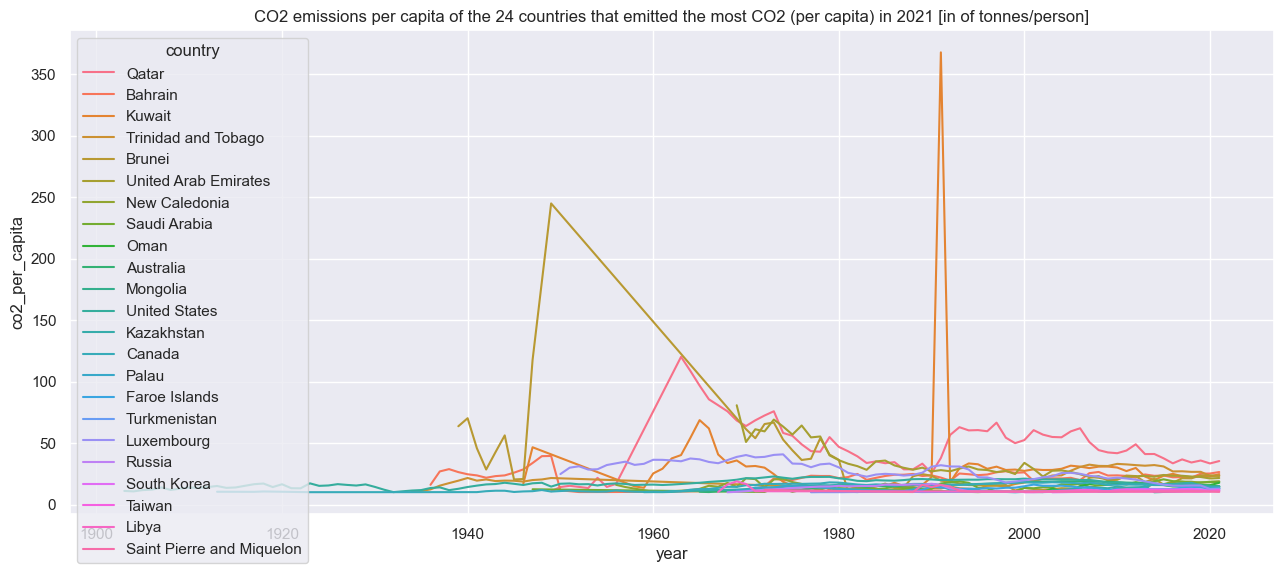

In [38]:
largest_emitters.drop(('Sint Maarten (Dutch part)', ), inplace=True)
sns.lineplot(data=largest_emitters, x='year', y='co2_per_capita', hue='country').set_title("CO2 emissions per capita of the 24 countries that emitted the most CO2 (per capita) in 2021 [in of tonnes/person]")

Besides the bizarre data from Sint Maarten, we see that the countries that emit the most $\text{CO}_2$ per person are also the major oil producers (Qatar, Bahrain, Kuwait, Trinidad and Tobago, etc) and they have a low population. However, this visualisation represents production-based emissions, and not consumption-based emissions. The country listed above are traditionnaly considered as poor in general. Let us see how this changes if we only look at the consumption-based emissions.

In [43]:
co2_countries = pd.concat([co2_emissions[co2_emissions['iso_code'].notna()], co2_emissions.loc[idx['Kosovo', :], idx[:]]])
nb_countries = len(list(co2_countries.loc[idx[:, 2021], idx['co2']]))
q = (nb_countries - 40)/nb_countries
print("Quantile: ", q)
# noinspection PyTypeChecker
quant_at_q = co2_countries.loc[idx[:, 2020], idx['consumption_co2_per_capita']].quantile(q)
print("Quantity emitted at " + str(q) + " in 2021: ", quant_at_q)
largest_emitters = co2_countries[co2_countries['consumption_co2_per_capita'] >= quant_at_q]
# noinspection PyTypeChecker
new_idx = list(largest_emitters.loc[idx[:, 2020], idx['consumption_co2_per_capita']].sort_values(ascending=False).index.get_level_values(0))
print("The largest emitters per capita (in 2020) are: ", new_idx)
## We reindex the dataframe according to the biggest emitters in 2021
largest_emitters = largest_emitters.reindex(new_idx, level='country')
largest_emitters

Quantile:  0.8283261802575107
Quantity emitted at 0.8283261802575107 in 2021:  9.650046
The largest emitters per capita (in 2020) are:  ['Qatar', 'Singapore', 'Brunei', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Trinidad and Tobago', 'Malta', 'United States', 'Belgium', 'Bahrain', 'Australia', 'Mongolia', 'Canada', 'Oman', 'South Korea', 'Luxembourg', 'Switzerland', 'Taiwan', 'Hong Kong', 'Kazakhstan']


co2  co2_per_capita   trade_co2  cement_co2  \
country    year                                                       
Qatar      1990   11.411196       25.835598   -0.684968    0.111420   
           1991   17.380476       38.073750   -1.533200    0.218300   
           1992   26.780340       56.822399   -3.695634    0.223669   
           1993   30.684492       63.129929   -3.830492    0.221997   
           1994   30.304340       60.525761   -3.514084    0.189949   
...                     ...             ...         ...         ...   
Kazakhstan 2015  301.273163       16.891382  -92.850845    3.456792   
           2016  304.839539       16.861940 -111.470734    3.524569   
           2017  320.791443       17.515402 -119.310989    3.817253   
           2018  331.820709       17.899391 -149.467010    3.890766   
           2020  278.404602       14.668894  -92.901581    4.448138   

                 cement_co2_per_capita    coal_co2  coal_co2_per_capita  \
country    year                                                           
Qatar      1990               0.252261    0.000000             0.000000   
           1991               0.478209    0.000000             0.000000   
           1992               0.474580    0.000000             0.000000   
           1993               0.456734    0.000000             0.000000   
           1994               0.379378    0.000000             0.000000   
...                                ...         ...                  ...   
Kazakhstan 2015               0.193811  183.235611            10.273411   
           2016               0.194959  183.031906            10.124253   
           2017               0.208424  187.961868            10.262828   
           2018               0.209879  190.787781            10.291657   
           2020               0.234368  181.010498             9.537284   

                 flaring_co2  flaring_co2_per_capita    gas_co2  ...  \
country    year                                                  ...   
Qatar      1990     0.000000                0.000000   8.899856  ...   
           1991     0.000000                0.000000  14.377536  ...   
           1992     0.000000                0.000000  22.053616  ...   
           1993     0.000000                0.000000  25.911808  ...   
           1994     0.000000                0.000000  25.914940  ...   
...                      ...                     ...        ...  ...   
Kazakhstan 2015    16.175615                0.906913  52.648056  ...   
           2016    17.295004                0.956658  54.721207  ...   
           2017    17.820606                0.973016  62.751163  ...   
           2018    16.760128                0.904091  68.573952  ...   
           2020    16.843903                0.887490  32.208294  ...   

                   methane  methane_per_capita  nitrous_oxide  \
country    year                                                 
Qatar      1990   2.710000            6.135594           0.10   
           1991   3.310000            7.250901           0.10   
           1992   3.200000            6.789745           0.11   
           1993   4.050000            8.332425           0.12   
           1994   4.630000            9.247332           0.15   
...                    ...                 ...            ...   
Kazakhstan 2015  47.349998            2.654757          10.89   
           2016  45.950001            2.541685          10.13   
           2017  50.650002            2.765520          13.38   
           2018  49.509998            2.670716          11.00   
           2020        NaN                 NaN            NaN   

                 nitrous_oxide_per_capita  primary_energy_consumption  \
country    year                                                         
Qatar      1990                  0.226406                   78.837662   
           1991                  0.219060                   90.812813   
           1992                  0.233397        

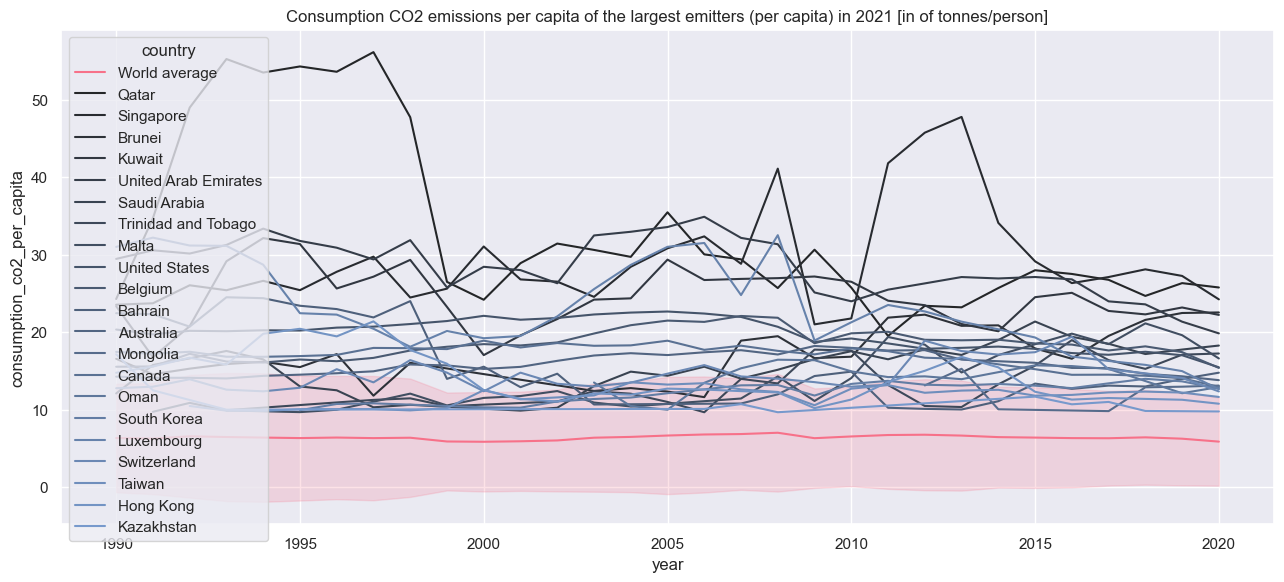

In [78]:
sns.lineplot(data=co2_countries, x='year', y='consumption_co2_per_capita', errorbar='sd', label="World average")
sns.lineplot(data=largest_emitters, x='year', y='consumption_co2_per_capita', hue='country',  palette=sns.dark_palette("#79C", n_colors=21)).set_title("Consumption CO2 emissions per capita of the largest emitters (per capita) in 2021 [in of tonnes/person]")
#plt.legend()
# plt.legend(["World average"]+new_idx)
plt.show()

We see that the countries emitting the most $\text{CO}_2$ from consumption are high income countries, except for Mongolia, South Korea and Kazakhstan. Moreover, most of these countries emit up to more than 3 times the global average, which was 4.8 tonnes per person in 2017.  
Therefore, we see that there is a strong correlation between income and per capita $\text{CO}_2$ emissions. Let us draw a map of the $\text{CO}_2$ emitted in each country since 1750 and investigate the relationship between income and $\text{CO}_2$ emissions.

In [ ]:
import plotly.express as px
fig = px.choropleth(co2_countries.swaplevel().sort_index(),
animation_frame=co2_countries.swaplevel().sort_index().index.get_level_values(0),
 locations='iso_code', 
 color='co2',
 hover_name=co2_countries.swaplevel().sort_index().index.get_level_values(1),
 projection='natural earth',
 title='co2 emitted by Country')
fig.show()